<a href="https://colab.research.google.com/github/yeshitha-kuppireddy/License-plate-recognition/blob/main/licenseplaterec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Yfrom google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
import os

def extract_all_zip_files(folder_path):
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.zip'):
            file_path = os.path.join(folder_path, file_name)
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(folder_path)  # Extract to the same folder
                print(f"Extracted {file_name}")

folder_path = '/content/drive/MyDrive/licenceplate'
extract_all_zip_files(folder_path)

Extracted Copy of Licplatesdetection_train.zip
Extracted Copy of Licplatesrecognition_train.zip
Extracted Copy of test.zip


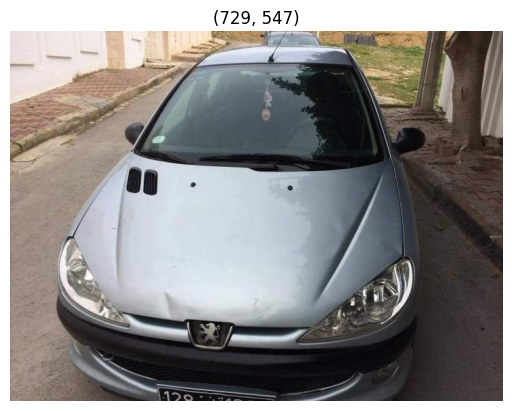

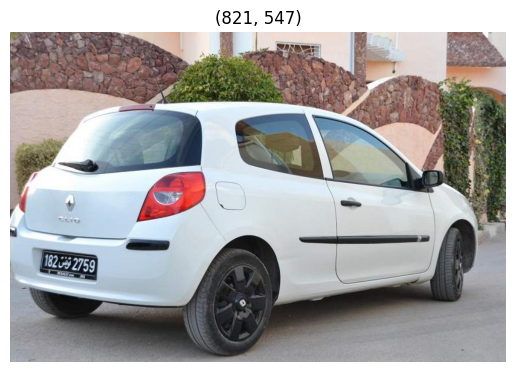

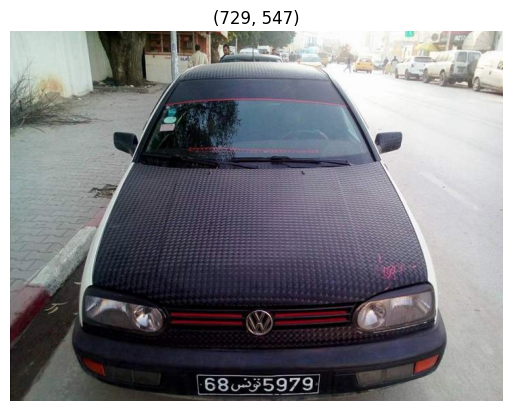

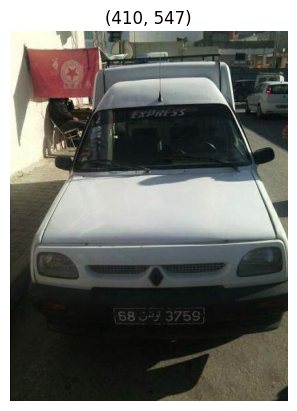

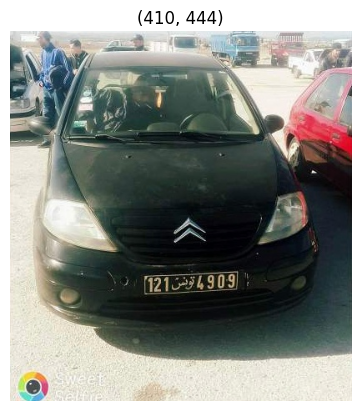

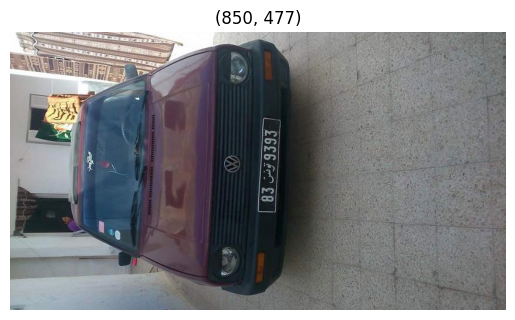

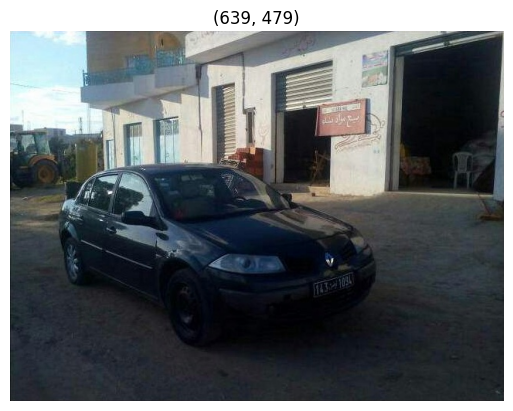

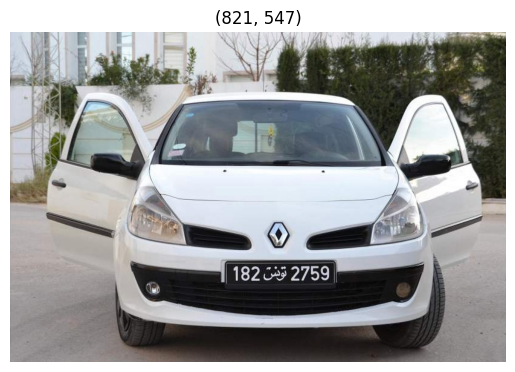

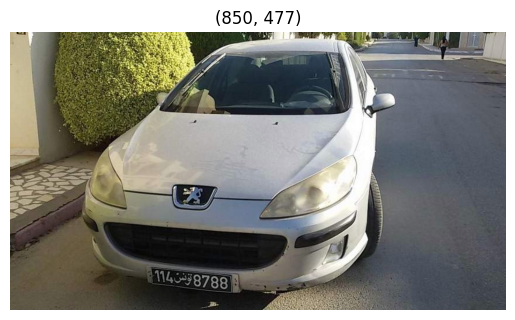

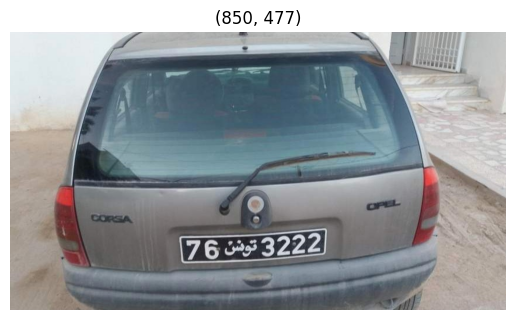

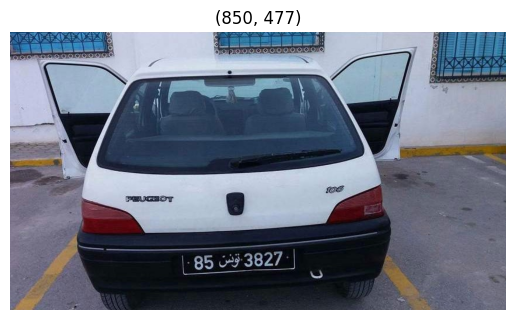

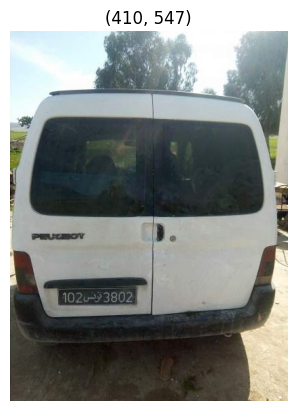

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder_path = '/content/drive/MyDrive/licenceplate/license_plates_detection_train'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Display images
for image_file in image_files[0:15]:
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(img.size)
    plt.axis('off')
    plt.show()

In [ ]:
import os
import pandas as pd
from PIL import Image

# Paths
csv_path = '/content/drive/MyDrive/licenceplate/Copy of Licplatesdetection_train.csv'
img_dir = '/content/drive/MyDrive/licenceplate/license_plates_detection_train'
labels_dir = '/content/drive/MyDrive/licence/dataset/labels/'

if not os.path.exists(labels_dir):
    os.makedirs(labels_dir)

# Load CSV
df = pd.read_csv(csv_path)

for _, row in df.iterrows():
    img_name = row['img_id']
    img_path = os.path.join(img_dir, img_name)
    img = Image.open(img_path)
    img_width, img_height = img.size

    # YOLO format: class_id, center_x, center_y, width, height
    x_min, y_min = row['xmin'], row['ymin']
    x_max, y_max = row['xmax'], row['ymax']
    center_x = (x_min + x_max) / 2 / img_width
    center_y = (y_min + y_max) / 2 / img_height
    bbox_width = (x_max - x_min) / img_width
    bbox_height = (y_max - y_min) / img_height

    # Assuming class_id is in the CSV, otherwise set to 0 or appropriate value
    class_id = 0

    label_path = os.path.join(labels_dir, f"{os.path.splitext(img_name)[0]}.txt")
    with open(label_path, 'a') as f:
        f.write(f"{class_id} {center_x} {center_y} {bbox_width} {bbox_height}\n")


In [ ]:
import os
import shutil
import random

# Paths
images_dir = '/content/drive/MyDrive/licence/images/train/'
labels_dir = '/content/drive/MyDrive/licence/labels/train/'

val_images_dir = '/content/drive/MyDrive/licence/images/val/'
val_labels_dir = '/content/drive/MyDrive/licence/labels/val/'

# Create directories if they don't exist
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# List all image files
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Shuffle and split
random.shuffle(image_files)
split_idx = int(len(image_files) * 0.9)

train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# Move validation images and corresponding labels
for file_name in val_files:
    # Move image
    shutil.move(os.path.join(images_dir, file_name), os.path.join(val_images_dir, file_name))

    # Move corresponding label file
    label_file_name = os.path.splitext(file_name)[0] + '.txt'
    shutil.move(os.path.join(labels_dir, label_file_name), os.path.join(val_labels_dir, label_file_name))

print(f"Moved {len(val_files)} files to validation set.")


Moved 90 files to validation set.


In [ ]:
%%writefile data.yaml
train: /content/drive/MyDrive/licence/images/train
val: /content/drive/MyDrive/licence/images/val

nc: 1
names: ['license_plate']


Writing data.yaml


In [ ]:
ROOT_DIR = '/content/drive/MyDrive/licence'

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 19.8 MB/s eta 0:00:00


In [ ]:
import os
os.environ['WANDB_DISABLED'] = 'true'


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/licence/data.yaml epochs=25 imgsz=800 plots=True

/bin/bash: line 1: yolo: command not found


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')
model.names

{0: 'license_plate'}

In [ ]:
import zipfile
import os

# Path to your ZIP file
zip_file_path = '/content/drive/MyDrive/rec.zip'
# Directory where you want to extract the files
extract_to_path = '/content/drive/MyDrive/recimages/'

# Create the directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f'Files extracted to {extract_to_path}')


Files extracted to /content/drive/MyDrive/recimages/


In [ ]:

import pytesseract
import cv2
import os
from google.colab import drive

# Mount Google Drive if your images are stored there
drive.mount('/content/drive')

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


Mounted at /content/drive


In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 19.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Example DataFrame creation (replace with your actual DataFrame loading code)
data=pd.read_csv('/content/drive/MyDrive/rec.csv')
df = pd.DataFrame(data)


In [ ]:
import easyocr
import cv2
import re
import os
import pandas as pd

# Initialize EasyOCR reader
reader = easyocr.Reader(['en', 'ar'])  # English and Arabic languages

def extract_and_sort_numbers_from_image(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    # Convert image to RGB as EasyOCR expects RGB images
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Perform OCR
    results = reader.readtext(img_rgb)

    # Sort results by the vertical position (y-coordinate) of the bounding boxes
    results_sorted = sorted(results, key=lambda x: x[0][0][1])

    # Combine the sorted text results into a single string
    text = ' '.join([result[1] for result in results_sorted])

    # Replace non-numeric characters with 'T'
    numbers_only = re.sub(r'[^\d]', 'T', text)

    # Replace multiple 'T's with a single 'T'
    single_t_text = re.sub(r'T+', 'T', numbers_only)

    # If 'T' is present, ensure it's correctly placed
    if 'T' in single_t_text:
        # Remove 'T' if it's at the start or end
        single_t_text = re.sub(r'^T+|T+$', '', single_t_text)
        # Ensure 'T' is surrounded by numbers
        single_t_text = re.sub(r'(\d)T+(\d)', r'\1T\2', single_t_text)

    return single_t_text

# Example DataFrame creation (replace with your actual DataFrame loading code)

# Directory containing your test images
image_folder = '/content/drive/MyDrive/recimages/license_plates_recognition_train'

# Function to update DataFrame with extracted text
def update_dataframe_with_extracted_text(df, image_folder):
    for index, row in df.iterrows():
        image_name = row['img_id']
        image_path = os.path.join(image_folder, image_name)
        extracted_text = extract_and_sort_numbers_from_image(image_path)
        df.at[index, 'pred_text'] = extracted_text

# Add 'pred_text' column to DataFrame
df['pred_text'] = ''

# Update DataFrame with extracted text
update_dataframe_with_extracted_text(df, image_folder)

print(df)


NameError: name 'df' is not defined

In [ ]:
import torch
import cv2
import os
import re
import pandas as pd
import easyocr
from ultralytics import YOLO

# Initialize YOLOv8 model
model = YOLO('/content/drive/MyDrive/licence/runs/detect/train2/weights/best.pt')

# Initialize EasyOCR with English and Arabic languages
reader = easyocr.Reader(['en', 'ar'])  # English and Arabic OCR support

def extract_and_sort_numbers_from_image(image):
    # Convert to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    img_preprocessed = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Optionally apply denoising
    img_denoised = cv2.fastNlMeansDenoising(img_preprocessed, None, 30, 7, 21)

    # Convert to RGB for EasyOCR
    img_rgb = cv2.cvtColor(img_denoised, cv2.COLOR_GRAY2RGB)

    # Perform OCR
    results = reader.readtext(img_rgb)

    # Sort the OCR results by the vertical position (y-coordinate) of the bounding boxes
    results_sorted = sorted(results, key=lambda x: x[0][0][1])

    # Combine the sorted text results into a single string
    text = ' '.join([result[1] for result in results_sorted])

    # Replace non-numeric characters with 'T'
    numbers_only = re.sub(r'[^\d]', 'T', text)

    # Replace multiple 'T's with a single 'T'
    single_t_text = re.sub(r'T+', 'T', numbers_only)

    # If 'T' is present, ensure it's correctly placed
    if 'T' in single_t_text:
        # Remove 'T' if it's at the start or end
        single_t_text = re.sub(r'^T+|T+$', '', single_t_text)
        # Ensure 'T' is surrounded by numbers
        single_t_text = re.sub(r'(\d)T+(\d)', r'\1T\2', single_t_text)

    return single_t_text


def process_images(image_folder, df):
    # Initialize list to store results
    results = []

    # Iterate over all images in the folder
    for img_name in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_name)
        img = cv2.imread(img_path)

        # Run YOLOv8 inference on the image
        yolo_results = model(img)

        # Extract bounding boxes from YOLO results
        for result in yolo_results:
            boxes = result.boxes.xyxy  # Get bounding boxes
            confs = result.boxes.conf  # Get confidence scores

            for box, conf in zip(boxes, confs):
                x1, y1, x2, y2 = map(int, box)

                # Crop the detected license plate
                plate_img = img[y1:y2, x1:x2]

                # Use EasyOCR to extract text from the cropped image
                extracted_text = extract_and_sort_numbers_from_image(plate_img)

                # Store the results
                results.append({
                    'image_name': img_name,
                    'pred_text': extracted_text,
                    'bounding_box': (x1, y1, x2, y2),
                    'confidence': conf.item()
                })

    # Convert results into DataFrame
    df_results = pd.DataFrame(results)
    print(df_results)
    return df_results


# Define directory containing your test images
image_folder = '/content/drive/MyDrive/licenceplate/test/test'

# Process images and update DataFrame with extracted text
df=process_images(image_folder, df)




0: 448x640 1 license_plate, 34.3ms
Speed: 13.8ms preprocess, 34.3ms inference, 831.4ms postprocess per image at shape (1, 3, 448, 640)

0: 640x384 1 license_plate, 57.6ms
Speed: 3.8ms preprocess, 57.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x480 1 license_plate, 98.6ms
Speed: 6.7ms preprocess, 98.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)

0: 384x640 1 license_plate, 57.2ms
Speed: 5.3ms preprocess, 57.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 640x384 1 license_plate, 24.5ms
Speed: 3.1ms preprocess, 24.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 license_plate, 10.1ms
Speed: 2.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x480 1 license_plate, 13.2ms
Speed: 3.5ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

0: 640x384 1 license_plate, 7.8ms
Speed: 3.4ms preprocess, 7.8ms 

In [ ]:
import pandas as pd



# Create columns for each character position (1st to 10th)
for i in range(1, 11):
    df[f'char_{i}'] = df['pred_text'].apply(lambda x: x[i-1] if len(x) >= i else '')

# Optionally, drop 'pred_text' column if not needed
# df = df.drop(columns=['pred_text'])

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_extracted_text_results.csv', index=False)

print("CSV updated with character columns.")


CSV updated with character columns.
